**Image processing**
---
1. Histogram Equalization
2. Median Filter
3. Mean Filter
4. Gaussian Smoothing


In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

**1. Histogram**

In [3]:
img = cv2.imread("/content/E6TKzqA.jpg")
assert img is not None, "file could not be read, check with os.path.exists()"

In [4]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()


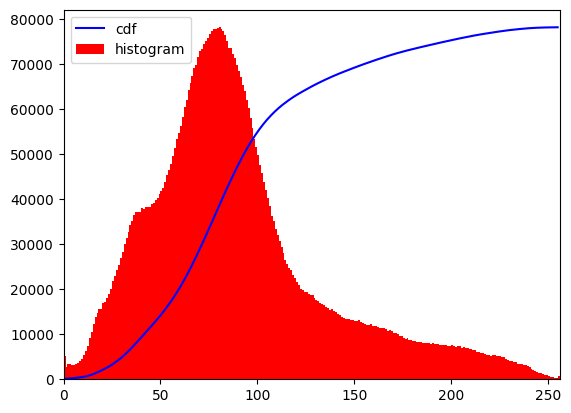

In [5]:
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [7]:
# cdf is normalized using maxmin
# to eliminate 0, cdf masked first
masked_cdf = np.ma.masked_equal(cdf,0)
#print(masked_cdf)
normalized_masked_cdf = (masked_cdf - masked_cdf.min())*255/(masked_cdf.max()-masked_cdf.min())
#print(normalized_masked_cdf)
normalized_cdf = np.ma.filled(normalized_masked_cdf, 0).astype('uint8')
#print(normalized_cdf)

In [8]:
img_hist_equalization = normalized_cdf[img]

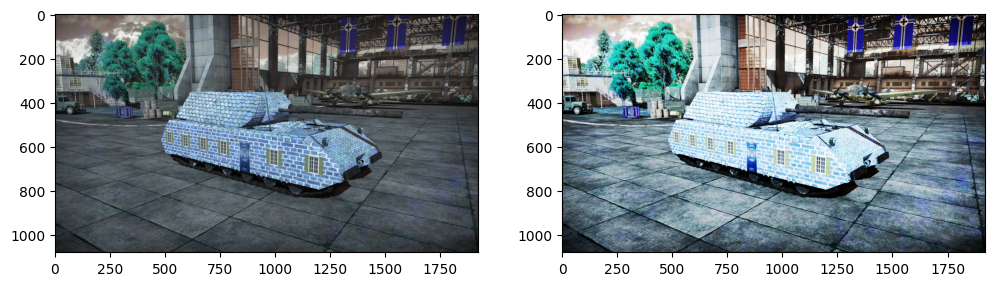

In [9]:
f, axis_array = plt.subplots(1,2, figsize=(12,8))
axis_array[0].imshow(img)
axis_array[1].imshow(img_hist_equalization)


**2. Median Filter**

In [36]:
def median_filter(image, kernelSize, padding = False):
  if(padding):
    col_pad = np.zeros([image.shape[0], 1, image.shape[2]]) #Added image.shape[2] to account for the third dimension
    image = np.concatenate((col_pad, image, col_pad), axis=1)
    row_pad = np.zeros([1, image.shape[1], image.shape[2]]) #Added image.shape[2] to account for the third dimension
    image = np.concatenate((row_pad, image, row_pad), axis=0)

  xIn, yIn = np.shape(image)[:2]
  xKer, yKer = kernelSize, kernelSize
  xOut = int(xIn - xKer + 1)
  yOut = int(yIn - yKer + 1)
  output = np.zeros((xOut, yOut))
  for j in range(yOut):
    for i in range(xOut):
      output[i,j] = np.median(image[i:i+xKer, j:j+yKer])

  return output

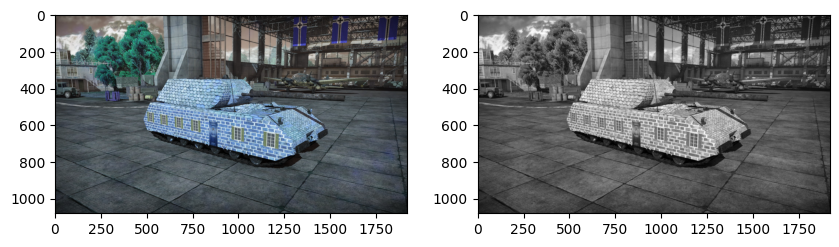

In [37]:
medianFiltered_outImage = median_filter(img, kernelSize=3, padding=True)
f, axis_array = plt.subplots(1,2, figsize=(10,8))
axis_array[0].imshow(img, cmap = 'gray')
axis_array[1].imshow(meanFiltered_outImage, cmap = 'gray')

**3 Mean Filter**

In [38]:
def mean_filter(image, kernelSize, padding = False):
  print(image.shape)
  if(padding):
    col_pad = np.zeros([image.shape[0], 1, image.shape[2]]) #Added image.shape[2] to account for the third dimension
    image = np.concatenate((col_pad, image, col_pad), axis=1)
    row_pad = np.zeros([1, image.shape[1], image.shape[2]]) #Added image.shape[2] to account for the third dimension
    image = np.concatenate((row_pad, image, row_pad), axis=0)

  xIn, yIn = np.shape(image)[:2] # Get the first 2 dimensions to assign to xIn and yIn
  xKer, yKer = kernelSize, kernelSize
  xOut = int(xIn - xKer + 1)
  yOut = int(yIn - yKer + 1)
  output = np.zeros((xOut, yOut))
  for j in range(yOut):
    for i in range(xOut):
      output[i,j] = np.mean(image[i:i+xKer, j:j+yKer])
  return output

(1080, 1920, 3)


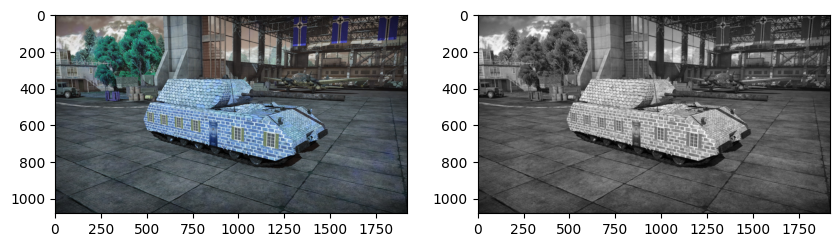

In [39]:
meanFiltered_outImage = mean_filter(img, kernelSize=3, padding=True)
f, axis_array = plt.subplots(1,2, figsize=(10,8))
axis_array[0].imshow(img, cmap = 'gray')
axis_array[1].imshow(meanFiltered_outImage, cmap = 'gray')

**4. Gaussian smoothing**

In [25]:
def gaussian(x2, sigma = 1):
  return 1.0/(2*np.pi*sigma**2)*np.exp(-x2/(2*sigma**2))

def gkernel_gen(ksize, sigma=1):
  kernel = np.zeros((ksize, ksize))
  for i in range(-int(ksize/2), int(ksize)-1, 1):
    for j in range(-int(ksize/2), int(ksize)-1, 1):
      kernel[i+1,j+1] = gaussian(i**2+j**2, sigma)
  return kernel

gkernel = gkernel_gen(3) * 1.50227216/0.05854983
print(gkernel)

[[1.5022722  2.47682813 1.5022722 ]
 [2.47682813 4.08359922 2.47682813]
 [1.5022722  2.47682813 1.5022722 ]]


In [33]:
def gaussian_filter(image, ksize = 3, sigma = 1, padding = False):
  if(padding):
    col_pad = np.zeros([image.shape[0], 1, image.shape[2]]) #Added image.shape[2] to account for the third dimension
    image = np.concatenate((col_pad, image, col_pad), axis=1)
    row_pad = np.zeros([1, image.shape[1], image.shape[2]]) #Added image.shape[2] to account for the third dimension
    image = np.concatenate((row_pad, image, row_pad), axis=0)

  xIn, yIn = np.shape(image)[:2]
  gkernel = gkernel_gen(ksize, sigma)

  xOut = int(xIn - ksize + 1)
  yOut = int(yIn - ksize + 1)
  output = np.zeros((xOut, yOut))
  for j in range(yOut):
    for i in range(xOut):
      output[i,j] = np.sum(image[i:i+ksize, j:j+ksize]*gkernel)
  output += 225-output.max()

  return output.astype('uint8')

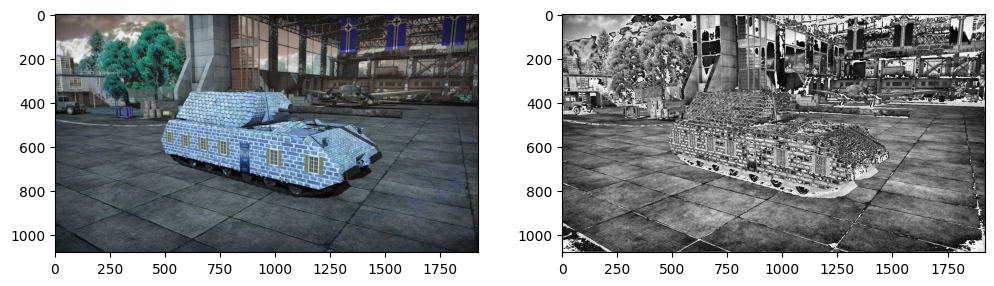

In [34]:
gaussianFiltered_outImage = gaussian_filter(img, ksize=3, sigma=1, padding=True)
f, axis_array = plt.subplots(1,2, figsize=(12,8))
axis_array[0].imshow(img, cmap = 'gray')
axis_array[1].imshow(gaussianFiltered_outImage, cmap = 'gray')